In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.regularizers import l2
from keras.regularizers import l2
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import transforms
from tensorflow.keras.callbacks import History
import torch.nn.functional as F


# Data info

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,pix10,...,pix1016,pix1017,pix1018,pix1019,pix1020,pix1021,pix1022,pix1023,pix1024,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,3
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,7
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52500 entries, 0 to 52499
Columns: 1025 entries, pix1 to label
dtypes: int64(1025)
memory usage: 410.6 MB


In [5]:
data.describe()

,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,pix10,...,pix1016,pix1017,pix1018,pix1019,pix1020,pix1021,pix1022,pix1023,pix1024,label
count,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000,...,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000
mean,0.877390,0.877390,0.877390,0.877390,0.877410,0.877429,0.877429,0.877543,0.878038,0.880648,...,0.929867,0.909143,0.893524,0.883505,0.878952,0.877467,0.877410,0.877390,0.877390,4.509752
std,1.493605,1.493605,1.493605,1.493605,1.493601,1.493596,1.493596,1.493682,1.494258,1.528912,...,2.835341,2.224631,1.794160,1.615415,1.505722,1.493854,1.493677,1.493605,1.493605,2.872106
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000
max,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,73.000000,...,187.000000,172.000000,134.000000,116.000000,41.000000,11.000000,11.000000,11.000000,11.000000,9.000000


In [6]:
data['label'].unique()

array([3, 7, 9, 5, 1, 6, 0, 4, 8, 2], dtype=int64)

In [7]:
# Cheacking for missing values(there are none)
missing_values = data.isnull().sum()

In [8]:
missing_values[missing_values > 0]

Series([], dtype: int64)

# Train val test sets

In [9]:
X = data.drop('label', axis=1).values
y = data['label'].values

In [10]:
X_train, X_tes, y_train, y_tes = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
X_test, X_val, y_test, y_val = train_test_split(X_tes, y_tes, test_size=0.5, random_state=42)


In [12]:
print("train data:", X_train.shape)
print("val data:", X_val.shape)
print("test data:", X_test.shape)

train data: (42000, 1024)
val data: (5250, 1024)
test data: (5250, 1024)


### Vizualization of imges

In [13]:
labels, counts = np.unique(y_train, return_counts=True)

for label, count in zip(labels, counts):
    print(f'Label {label}: {count} items')

Label 0: 4138 items
Label 1: 4082 items
Label 2: 4175 items
Label 3: 4238 items
Label 4: 4164 items
Label 5: 4276 items
Label 6: 4186 items
Label 7: 4260 items
Label 8: 4230 items
Label 9: 4251 items


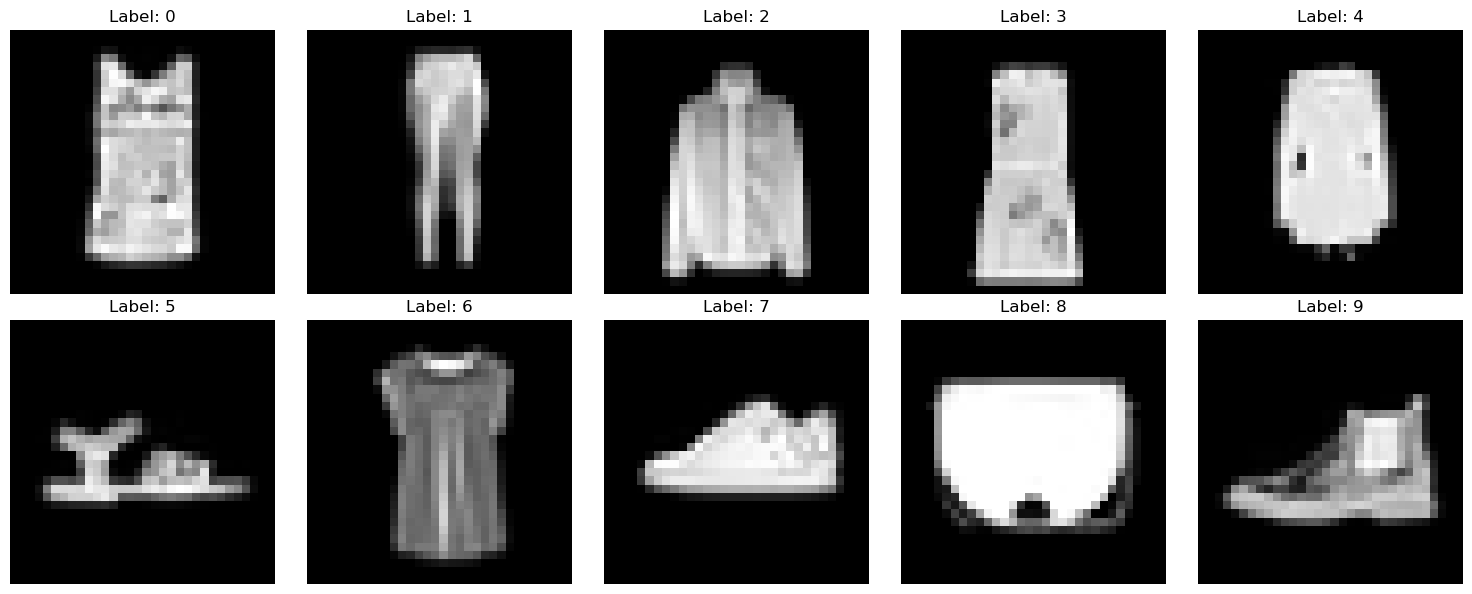

In [14]:
unique_labels = np.unique(y_train)
num_labels = len(unique_labels)

#Create a grid of images according to the number of labels
cols = 5  # Number of columns
rows = num_labels // cols + (num_labels % cols > 0)  # Number of lines

fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))
axes = axes.ravel()  # Flatten the axis field for easier handling

for i, label in enumerate(unique_labels):
    index = np.where(y_train == label)[0][0]  #Find the first index for the label
    axes[i].imshow(X_train[index].reshape(32, 32), cmap='gray')
    axes[i].set_title(f'Label: {label}')
    axes[i].axis('off')

# axis off
for j in range(i + 1, rows * cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

The dataset consists of various items of clothing (bags, shoes, dresses and so on)

# TensorFlow

#### FNN

A fully connected neural network using TensorFlow is generally less suitable for handling image data such as clothing photos, as it does not exploit the spatial hierarchies in images effectively compared to convolutional architectures.

In [15]:
#normilizing data
X_train_norm = X_train / 255.0
X_val_norm = X_val / 255.0

In [16]:
#variable layer sizes, dropout, and regularization
def build_model(layer_sizes, dropout_rate=0.0, regularization=None):
    model = Sequential()
    # input layer
    model.add(Input(shape=(1024,)))    
    # hidden layers
    for size in layer_sizes:
        model.add(Dense(size, activation='relu', kernel_regularizer=regularization))
    #dropout if specified
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    #output 
    model.add(Dense(10, activation='softmax'))
    return model


In [17]:
#configuration
layer_configs = [[512, 256, 128], [256, 128, 64], [128, 64, 32]]
optimizers = [
    (SGD, {'learning_rate': 0.01, 'momentum': 0.9}),
    (Adam, {'learning_rate': 0.001}),
    (RMSprop, {'learning_rate': 0.001})
]
regularizations = [None, l2(0.01)]
results = []

In [18]:
for layers in layer_configs:
    for optimizer_class, optimizer_params in optimizers:  
        for regularization in regularizations:
            model = build_model(layers, dropout_rate=0.5, regularization=regularization)
            optimizer = optimizer_class(**optimizer_params)
            model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            
            history_callback = History()

            model.fit(X_train_norm, y_train, validation_data=(X_val_norm, y_val), #training
                      epochs=10, batch_size=32, verbose=1, callbacks=[history_callback])
            
            history = history_callback.history
            
            for epoch in range(10):
                epoch_results = {
                    'epoch': epoch + 1,
                    'layers': layers,
                    'optimizer': optimizer.get_config()['name'],
                    'regularization': 'None' if regularization is None else 'L2',
                    'train_loss': history['loss'][epoch],
                    'train_accuracy': history['accuracy'][epoch],
                    'val_loss': history['val_loss'][epoch],
                    'val_accuracy': history['val_accuracy'][epoch]
                }
                results.append(epoch_results)

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6052 - loss: 1.0687 - val_accuracy: 0.7516 - val_loss: 0.6150
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7705 - loss: 0.6210 - val_accuracy: 0.8000 - val_loss: 0.5286
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8035 - loss: 0.5382 - val_accuracy: 0.8170 - val_loss: 0.5031
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8118 - loss: 0.5098 - val_accuracy: 0.8170 - val_loss: 0.4863
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8254 - loss: 0.4715 - val_accuracy: 0.8246 - val_loss: 0.4699
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8363 - loss: 0.4472 - val_accuracy: 0.8337 - val_loss: 0.4473
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8412 - loss: 0.4306 - val_accuracy: 0.8335 - val_loss: 0.4265
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8503 - loss: 0.407

In [19]:
best_result = max(results, key=lambda x: x['val_accuracy'])
print(f"Best Validation Accuracy: {best_result['val_accuracy']}%")
print(f"Configurations: Layers: {best_result['layers']}, Optimizer: {best_result['optimizer']}, Regularization: {best_result['regularization']}")


Best Validation Accuracy: 0.850857138633728%
Configurations: Layers: [512, 256, 128], Optimizer: adam, Regularization: None


The best one so far is Layers: [512, 256, 128], Optimizer: adam, Regularization: None, Val Loss: 0.4152, Val Accuracy: 85%, wich is not bad but with pytorch we can try to get better result

# PyTorch

#### FNN

Similar to TensorFlow's FNN, a fully connected network in PyTorch might not be optimal for clothing images due to its inability to capture spatial and local correlations efficiently in image data.

In [20]:
#data reformatting and normalization for FNN
X_train_fnn = X_train.reshape(-1, 32*32) / 255.0
X_val_fnn = X_val.reshape(-1, 32*32) / 255.0
X_test_fnn = X_test.reshape(-1, 32*32) / 255.0

In [21]:
train_tensor_fnn = TensorDataset(torch.Tensor(X_train_fnn), torch.Tensor(y_train).long())
val_tensor_fnn = TensorDataset(torch.Tensor(X_val_fnn), torch.Tensor(y_val).long())
test_tensor_fnn = TensorDataset(torch.Tensor(X_test_fnn))

In [22]:
train_loader_fnn = DataLoader(train_tensor_fnn, batch_size=64, shuffle=True)
val_loader_fnn = DataLoader(val_tensor_fnn, batch_size=64, shuffle=False)

In [23]:
class CustomFNN(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(CustomFNN, self).__init__()
        self.layers = nn.ModuleList()
        current_size = input_size
        for size in hidden_sizes:
            self.layers.append(nn.Linear(current_size, size))
            current_size = size
        self.output_layer = nn.Linear(current_size, output_size)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # making sure that the data is solved correctly
        for layer in self.layers:
            x = F.relu(layer(x))
        x = self.output_layer(x)
        return x

In [24]:
def train_and_validate(model, train_loader, val_loader, optimizer, criterion, layers, optimizer_name, regularization, epochs=10):
    results = []
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        correct = 0
        total = 0
        
        for inputs, labels in train_loader_fnn:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() #accumulate the training loss over all batches and count correct predictions
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        train_accuracy = 100 * correct / total
        train_loss /= len(train_loader)

        val_loss, val_accuracy = validate(model, val_loader_fnn, criterion)

        results.append({ #saving results
            'epoch': epoch + 1,
            'layers': layers,
            'optimizer': optimizer_name,
            'regularization': 'L2' if regularization else 'None',
            'train_loss': train_loss,
            'train_accuracy': train_accuracy,
            'val_loss': val_loss,
            'val_accuracy': val_accuracy
        })

        print(f'Epoch {epoch + 1}/{epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')
      
    return results


In [25]:
def validate(model, val_loader_fnn, criterion):
    model.eval()  # Putting the model into evaluation
    val_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():  # disable gradients to speed up and reduce memory consumption
        for inputs, labels in val_loader_fnn:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    val_accuracy = 100 * correct / total
    val_loss /= len(val_loader_fnn)
    return val_loss, val_accuracy

In [26]:
#layers
layer_configs = [
    [32, 64],
    [64, 128],
    [128, 256]
]

# optimizers
optimizers = [
    (optim.SGD, {'lr': 0.01}),
    (optim.Adam, {'lr': 0.001}),
    (optim.RMSprop, {'lr': 0.001})
]

# regularization
regularizations = [
    None,  
    {'weight_decay': 0.01}  # L2 
]


In [27]:
input_size = 1024  # input size
output_size = 10
for layers in layer_configs:
    for optimizer_info, optimizer_params in optimizers:
        for regularization in regularizations:
            #Initializing the model 
            model = CustomFNN(input_size, layers, output_size)
            optimizer = optimizer_info(model.parameters(), **optimizer_params)
            optimizer_name = optimizer.__class__.__name__  # Получение имени класса оптимизатора
            criterion = nn.CrossEntropyLoss()

            # pass all necessary parameters to the teaching function
            results = train_and_validate(
                model, 
                train_loader_fnn, 
                val_loader_fnn, 
                optimizer, 
                criterion, 
                layers, 
                optimizer_name, 
                regularization, 
                epochs=10
            )

Epoch 1/10, Train Loss: 1.8945, Train Accuracy: 33.42%, Val Loss: 1.3474, Val Accuracy: 53.96%
Epoch 2/10, Train Loss: 1.1516, Train Accuracy: 58.08%, Val Loss: 1.0172, Val Accuracy: 63.12%
Epoch 3/10, Train Loss: 0.9459, Train Accuracy: 64.97%, Val Loss: 0.8889, Val Accuracy: 67.68%
Epoch 4/10, Train Loss: 0.8409, Train Accuracy: 68.95%, Val Loss: 0.8119, Val Accuracy: 70.08%
Epoch 5/10, Train Loss: 0.7785, Train Accuracy: 71.45%, Val Loss: 0.7619, Val Accuracy: 72.78%
Epoch 6/10, Train Loss: 0.7361, Train Accuracy: 73.03%, Val Loss: 0.7414, Val Accuracy: 72.25%
Epoch 7/10, Train Loss: 0.7095, Train Accuracy: 73.87%, Val Loss: 0.8027, Val Accuracy: 69.09%
Epoch 8/10, Train Loss: 0.6878, Train Accuracy: 74.65%, Val Loss: 0.7207, Val Accuracy: 72.10%
Epoch 9/10, Train Loss: 0.6705, Train Accuracy: 75.45%, Val Loss: 0.6730, Val Accuracy: 76.04%
Epoch 10/10, Train Loss: 0.6557, Train Accuracy: 75.98%, Val Loss: 0.6652, Val Accuracy: 76.51%
Epoch 1/10, Train Loss: 1.9335, Train Accuracy: 3

In [29]:
best_result_pytorch = max(results, key=lambda x: x['val_accuracy'])
print(f"Best Validation Accuracy: {best_result_pytorch['val_accuracy']}%")
print(f"Epoch: {best_result_pytorch['epoch']}, Train Loss: {best_result_pytorch['train_loss']}, Val Loss: {best_result_pytorch['val_loss']}")


Best Validation Accuracy: 84.0%
Epoch: 8, Train Loss: 0.3605940985398387, Val Loss: 0.44598211294197176


# PyTorch

#### CNN

 A convolutional neural network in PyTorch is highly appropriate for processing clothing images, as it can leverage spatial relationships through its convolutional filters, making it better at recognizing patterns and features in image data, so probably its the best option

In [46]:
X_train_r = X_train.reshape(-1, 1, 32, 32) / 255.0
X_val_r = X_val.reshape(-1, 1, 32, 32) / 255.0
X_test_r = X_test.reshape(-1, 1, 32, 32) / 255.0 #normalizing

In [47]:
train_tensor = TensorDataset(torch.Tensor(X_train_r), torch.Tensor(y_train).long())
val_tensor = TensorDataset(torch.Tensor(X_val_r), torch.Tensor(y_val).long())
test_tensor = TensorDataset(torch.Tensor(X_test_r), torch.Tensor(y_test).long())

#train test val tensor

In [48]:
train_loader = DataLoader(train_tensor, batch_size=64, shuffle=True)
val_loader = DataLoader(val_tensor, batch_size=64, shuffle=False)

In [49]:
class CustomCNN(nn.Module):
    def __init__(self, layers, regularization=None):
        super(CustomCNN, self).__init__()
        self.layers = nn.ModuleList()
        input_channels = 1  # start with 1 chennel

        for output_channels in layers:
            self.layers.append(nn.Conv2d(input_channels, output_channels, kernel_size=3, padding=1))#adding to layers 
            self.layers.append(nn.ReLU())
            self.layers.append(nn.MaxPool2d(2))
            input_channels = output_channels

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_channels * (32 // 2**len(layers))**2, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )
        self.regularization = regularization


    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        x = self.classifier(x)
        return x


In [50]:
#layers
layer_configs = [
    [32, 64],
    [64, 128],
    [128, 256]
]

# optimizers
optimizers = [
    (optim.SGD, {'lr': 0.01}),
    (optim.Adam, {'lr': 0.001}),
    (optim.RMSprop, {'lr': 0.001})
]

# regularization
regularizations = [
    None,  
    {'weight_decay': 0.01}  # L2 
]
results = []

In [51]:
def train_and_validate(model, train_loader, val_loader, optimizer, criterion, layers, regularization, epochs=10):
    results = []
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        correct = 0
        total = 0
        
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_accuracy = 100 * correct / total
        train_loss /= len(train_loader)

        val_loss, val_accuracy = validate(model, val_loader, criterion)

        results.append({
            'epoch': epoch + 1,
            'layers': layers,
            'optimizer': optimizer.__class__.__name__,
            'regularization': 'L2' if regularization else 'None',
            'train_loss': train_loss,
            'train_accuracy': train_accuracy,
            'val_loss': val_loss,
            'val_accuracy': val_accuracy
        })

        print(f'Epoch {epoch + 1}/{epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')
      
    return results

In [52]:
def validate(model, val_loader, criterion):
    model.eval()  # evaluation
    val_loss = 0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    val_loss /= len(val_loader)
    val_accuracy = 100 * correct / total
    return val_loss, val_accuracy

In [ ]:
for layers in layer_configs:
    for optimizer_info, optimizer_params in optimizers:
        for regularization in regularizations:
            model = CustomCNN(layers, regularization)
            optimizer = optimizer_info(model.parameters(), **optimizer_params)
            criterion = nn.CrossEntropyLoss()

            results = train_and_validate(model, train_loader, val_loader, optimizer, criterion, layers, regularization, epochs=10)

Epoch 1/10, Train Loss: 1.5118, Train Accuracy: 49.32%, Val Loss: 1.0702, Val Accuracy: 60.11%
Epoch 2/10, Train Loss: 0.8278, Train Accuracy: 69.36%, Val Loss: 0.9480, Val Accuracy: 65.43%
Epoch 3/10, Train Loss: 0.7253, Train Accuracy: 73.00%, Val Loss: 0.8070, Val Accuracy: 68.80%
Epoch 4/10, Train Loss: 0.6608, Train Accuracy: 75.56%, Val Loss: 0.7169, Val Accuracy: 72.23%
Epoch 5/10, Train Loss: 0.6159, Train Accuracy: 77.22%, Val Loss: 0.6503, Val Accuracy: 76.34%
Epoch 6/10, Train Loss: 0.5822, Train Accuracy: 78.48%, Val Loss: 0.6667, Val Accuracy: 74.91%
Epoch 7/10, Train Loss: 0.5500, Train Accuracy: 79.99%, Val Loss: 0.6064, Val Accuracy: 77.71%
Epoch 8/10, Train Loss: 0.5310, Train Accuracy: 80.54%, Val Loss: 0.6530, Val Accuracy: 73.71%
Epoch 9/10, Train Loss: 0.5087, Train Accuracy: 81.28%, Val Loss: 0.6221, Val Accuracy: 74.63%
Epoch 10/10, Train Loss: 0.4936, Train Accuracy: 81.89%, Val Loss: 0.5098, Val Accuracy: 81.73%
Epoch 1/10, Train Loss: 1.5736, Train Accuracy: 4

In [45]:
best_result_pytorch = max(results, key=lambda x: x['val_accuracy'])
print(f"Best Validation Accuracy: {best_result_pytorch['val_accuracy']}%")
print(f"Epoch: {best_result_pytorch['epoch']}, Train Loss: {best_result_pytorch['train_loss']}, Val Loss: {best_result_pytorch['val_loss']}")


Best Configuration: Layers: [64, 128], Optimizer: Adam, Regularization: None, Val Accuracy: 89.71%


# Final model

In [ ]:
class CustomCNN(nn.Module):
    def __init__(self, layers):
        super(CustomCNN, self).__init__()
        self.layers = nn.ModuleList()
        input_channels = 1  

        for output_channels in layers:
            self.layers.append(nn.Conv2d(input_channels, output_channels, kernel_size=3, padding=1))
            self.layers.append(nn.ReLU())
            self.layers.append(nn.MaxPool2d(2))
            input_channels = output_channels

        # classification layer
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_channels * (32 // 2**len(layers))**2, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        x = self.classifier(x)
        return x

In [ ]:
model = CustomCNN([64, 128])
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam with best learning rate
criterion = nn.CrossEntropyLoss()

In [ ]:
def train_and_validate(model, train_loader, val_loader, optimizer, criterion, epochs):
    model.train()
    for epoch in range(epochs):
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        print(f'Epoch {epoch + 1}/{epochs} training complete.')

    
    model.eval()
    with torch.no_grad():
        val_loss = 0
        correct = 0
        total = 0
        for inputs, labels in val_loader:
            outputs = model(inputs)
            val_loss += criterion(outputs, labels).item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        val_accuracy = 100 * correct / total
        print(f'Validation Accuracy: {val_accuracy:.2f}%')

    return model

In [ ]:
final_model = train_and_validate(model, train_loader, val_loader, optimizer, criterion, epochs=10)


In [ ]:
# saving trained model
torch.save(final_model.state_dict(), 'final_best_model.pth

# Test data

In [ ]:
model = CustomCNN([64, 128])

#weights
model.load_state_dict(torch.load('final_best_model.pth'))

# evaluation
model.eval()

In [ ]:
test_loader = DataLoader(test_tensor, batch_size=64, shuffle=False)

In [ ]:
def evaluate_model(model, data_loader):
    model.eval()  # Перевод модели в режим оценки
    total = 0
    correct = 0
    total_loss = 0.0
    criterion = torch.nn.CrossEntropyLoss()  # Использование CrossEntropyLoss для классификации

    with torch.no_grad():  # Отключение градиентов для ускорения вычислений
        for inputs, labels in data_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    avg_loss = total_loss / total
    accuracy = 100 * correct / total
    return avg_loss, accuracy

In [ ]:
test_loss, test_accuracy = evaluate_model(model, test_loader)

In [ ]:
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.2f}%')

# Evaluation

In [ ]:
test_data = pd.read_csv('evaluate.csv')
X_test = test_data.drop('ID', axis=1).values
X_test = X_test.reshape(-1, 1, 32, 32) / 255.0  
test_ids = test_data['ID']

# to tensor pytorch
test_tensor = TensorDataset(torch.Tensor(X_test))

# DataLoader
test_loader = DataLoader(test_tensor, batch_size=64, shuffle=False)

In [ ]:
model = CustomCNN([64, 128])  
model.load_state_dict(torch.load('final_best_model.pth'))
model.eval()

# collecting predictions
predictions = []
with torch.no_grad():
    for inputs in test_loader:
        outputs = model(inputs[0])
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.tolist())

In [ ]:
results_df = pd.DataFrame({
    'ID': test_ids,
    'label': predictions
})

#df to csv
results_df.to_csv('results.csv', index=False)